# **ZMSI_Lab_2**
Wstępne przetwarzanie obrazów

$\color{red}{Uwaga:}$

1- proszę pamiętać o zmianie słowa ***Album*** w nazwie pliku i uzupełnieniu swoich danych powyżej tego pola;

2- kluczowe polecenia proszę opatrzyć komentarzem;

3- wnioski, pod zadaniem, wpisujemy w polu tekstowym.

In [ ]:
# Podpisywanie pracy
NN = input("Podaj Imię i Nazwisko: ")
ALBUM = input("Podaj numer albumu: ")

Podaj Imię i Nazwisko: Kacper Gąsowski
Podaj numer albumu: 154845


In [ ]:
# Ocena pracy. Proszę nie zmieniać komórek z kodem pomocniczym do oceny.
punkty = []
max = int(30)

### **Zad 2.1.** Zapoznaj się z dokumentacją modułu *Image* i *ImageOps* biblioteki **Pillow** i przetestuj narzędzia względnej zmiany obrazów dostępne w tym module (wykorzystaj przykładowe dane ze zbioru Stanford Dogs Dataset).

In [1]:
# Import modułów z biblioteki Pillow
from PIL import Image, ImageOps

# Montowanie dysku Googla
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os

# Ścieżka do nowego folderu
folder_path = '/content/drive/My Drive/KUL/Obrazy'

# Tworzenie folderu
os.makedirs(folder_path, exist_ok=True)

In [ ]:
# Wczytanie i rozpakowanie zbioru obrazów psów
!wget -P /content/drive/MyDrive/KUL/Obrazy http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
!tar -xvf /content/drive/MyDrive/KUL/Obrazy/images.tar -C /content/drive/MyDrive/KUL/Obrazy #-x: wyodrębnij pliki z archiwum, -v: wyświetlaj szczegółowe informacje o postępie operacji, -f images.tar: użyj pliku images.tar jako źródła dla operacji.

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
Images/n02109047-Great_Dane/n02109047_34148.jpg
Images/n02109047-Great_Dane/n02109047_34162.jpg
Images/n02109047-Great_Dane/n02109047_34209.jpg
Images/n02109047-Great_Dane/n02109047_3643.jpg
Images/n02109047-Great_Dane/n02109047_4267.jpg
Images/n02109047-Great_Dane/n02109047_481.jpg
Images/n02109047-Great_Dane/n02109047_5618.jpg
Images/n02109047-Great_Dane/n02109047_5675.jpg
Images/n02109047-Great_Dane/n02109047_5822.jpg
Images/n02109047-Great_Dane/n02109047_5894.jpg
Images/n02109047-Great_Dane/n02109047_5936.jpg
Images/n02109047-Great_Dane/n02109047_6008.jpg
Images/n02109047-Great_Dane/n02109047_6265.jpg
Images/n02109047-Great_Dane/n02109047_6276.jpg
Images/n02109047-Great_Dane/n02109047_6447.jpg
Images/n02109047-Great_Dane/n02109047_6680.jpg
Images/n02109047-Great_Dane/n02109047_7072.jpg
Images/n02109047-Great_Dane/n02109047_7156.jpg
Images/n02109047-Great_Dane/n02109047_7227.jpg
Images/n02109047-Great_Dane/n02109047_74

In [4]:
import matplotlib.pyplot as plt

# Wyświetlenie obrazu
img = Image.open('/content/drive/MyDrive/KUL/Obrazy/Images/n02089867-Walker_hound/n02089867_1062.jpg')

plt.imshow(img)
plt.axis('off')  # Wyłączenie osi

(-0.5, 499.5, 351.5, -0.5)

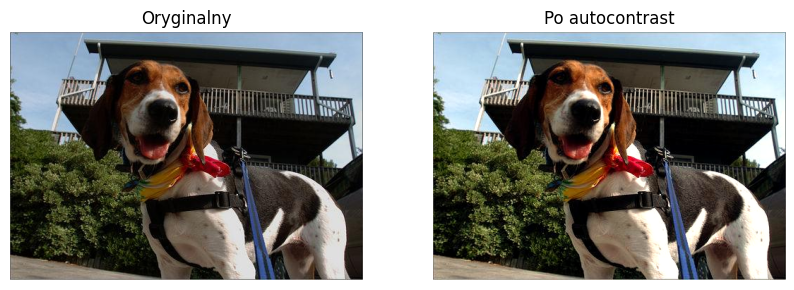

In [5]:
# Zastosowanie autocontrastu
image_contrasted = ImageOps.autocontrast(img, cutoff=5)

# Wyświetlenie oryginalnego i przetworzonego obrazu
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Oryginalny")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Po autocontrast")
plt.imshow(image_contrasted)
plt.axis('off')

plt.show()

Ta funkcja oblicza histogram obrazu wejściowego (lub obszaru maski), usuwa cutoffprocent najjaśniejszych i najciemniejszych pikseli z histogramu i ponownie mapuje obraz tak, aby najciemniejszy piksel stał się czarny (0), a najjaśniejszy stał się biały.

In [ ]:
# W tym przykładzie obraz zostanie otwarty, a następnie wyświetlony, a po zakończeniu bloku with plik zostanie zamknięty automatycznie.

In [7]:
size = (100, 150)

with Image.open("/content/drive/MyDrive/KUL/Obrazy/Images/n02089867-Walker_hound/n02089867_1062.jpg") as img:

  print(img.size)

  img_contain=ImageOps.contain(img, size)
  print(img_contain.size)
  img_contain.save("obraz_kolorowy_contain.jpg")

  img_fit=ImageOps.fit(img, size)
  print(img_fit.size)
  img_fit.save("obraz_kolorowy_fit.jpg")

  img_pad=ImageOps.contain(img, size)
  print(img_pad.size)
  img_pad.save("obraz_kolorowy_pad.jpg")

(500, 352)
(100, 70)
(100, 150)
(100, 70)


In [ ]:
# Maksymalna wartość punktów za Zad 2.1: 10
punkty.append(10)

### **Zad 2.2.** Zapoznaj się z dokumentacją klasy *ImageDataGenerator* biblioteki **Keras** i przetestuj dostępne w niej narzędzie automatycznego generowania paczek tensorów na obrazach z zad. 2.1.

In [8]:
!pip install tensorflow keras

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Ścieżka do folderu z przetworzonymi obrazami
data_path = '/content/drive/MyDrive/KUL/Obrazy/Images/'

# Tworzenie obiektu ImageDataGenerator z wybranymi augmentacjami
datagen = ImageDataGenerator(
    rescale=1.0/255,       # Skaluje wartości pikseli do przedziału [0, 1]
    rotation_range=40,     # Losowy obrót w zakresie do 40 stopni
    width_shift_range=0.2, # Losowe przesunięcie w poziomie
    height_shift_range=0.2,# Losowe przesunięcie w pionie
    shear_range=0.2,       # Losowe zastosowanie transformacji ukośnej
    zoom_range=0.2,        # Losowe skalowanie obrazu
    horizontal_flip=True,  # Losowe odbicie lustrzane w poziomie
    fill_mode='nearest'    # Sposób uzupełniania pikseli po transformacji
)

# Tworzenie generatora danych
generator = datagen.flow_from_directory(
    directory=data_path,
    target_size=(150, 150),  # Rozmiar obrazu
    batch_size=32,           # Liczba obrazów w paczce
    class_mode='binary'      # Klasyfikacja binarna
)


Found 20580 images belonging to 120 classes.


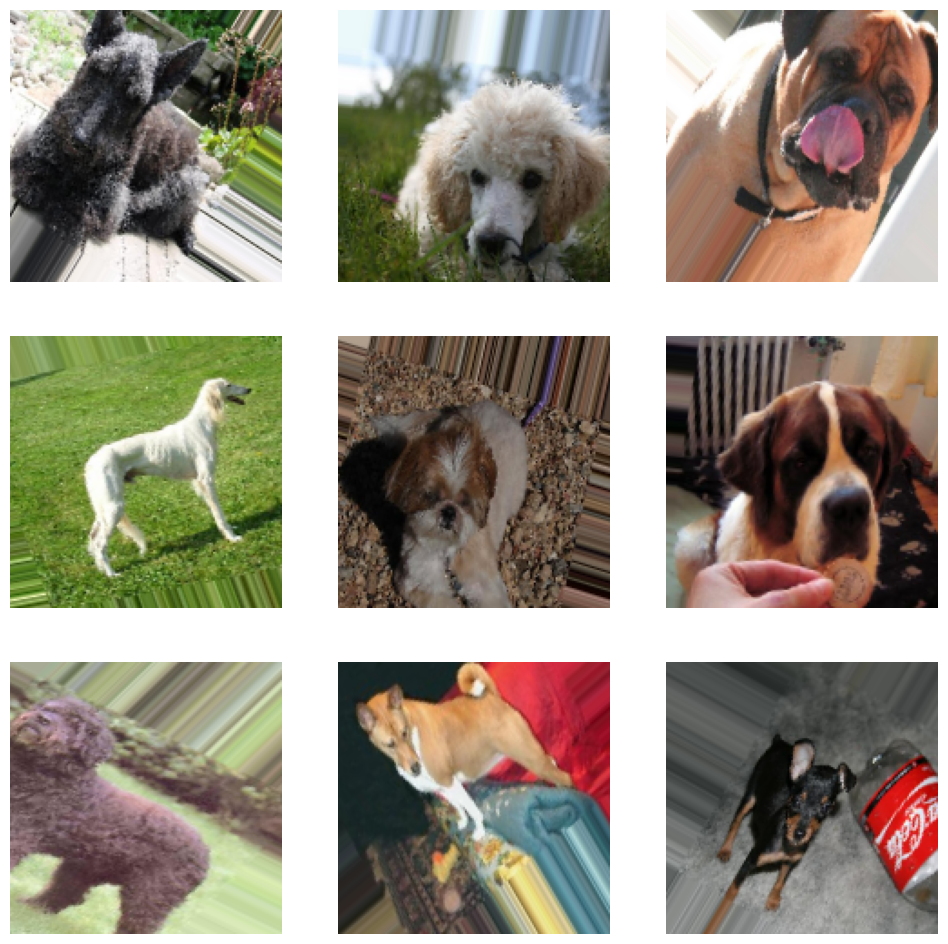

In [11]:
# Pobranie jednej paczki danych
images, labels = next(generator)

# Wyświetlenie kilku przetworzonych obrazów
plt.figure(figsize=(12, 12))
for i in range(9):  # Wyświetlamy 9 próbek
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()


In [ ]:
# Maksymalna wartość punktów za Zad 2.2: 10
punkty.append(10)

###**Zad. 2.3.** Zaimplementuj metodę standaryzacji wartości kolorów pikseli i przetestuj metodę na obrazach z zad. 2.1.

Procedura powinna obejmować następujące kroki:
- importujemy bibliotekę do obliczeń numerycznych
- z obiektu *data* pobieramy tylko obrazy (bez etykiet)
- obliczamy średnią i odchylenie standardowe dla każdego kanału RGB
- tworzymy nowy obiekt np. data_s poprzez odjęcie średniej od każdego piksela (co centruje dane wokół zera) i podzielenie przez odchylenie standardowe (co skalibruje dane, aby miały jednostkową wariancję).

Do odchylenia standardowego należy dodać 1e-7, aby uniknąć dzielenia przez zero, co mogłoby prowadzić do błędów, gdyby std wynosiło 0.

In [12]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Importujemy zbiór danych i przeprowadzamy augmentacje z ImageDataGenerator
data_path = '/content/drive/MyDrive/KUL/Obrazy/Images/'
datagen = ImageDataGenerator(
    rescale=1.0/255,        # Skaluje wartości pikseli do przedziału [0, 1]
    rotation_range=40,      # Losowy obrót do 40 stopni
    width_shift_range=0.2,  # Przesunięcie w poziomie
    height_shift_range=0.2, # Przesunięcie w pionie
    shear_range=0.2,        # Transformacja ukośna
    zoom_range=0.2,         # Skalowanie
    horizontal_flip=True,   # Odbicie lustrzane w poziomie
    fill_mode='nearest'     # Sposób uzupełniania pikseli
)

# Wczytanie obrazów do generatora
generator = datagen.flow_from_directory(
    directory=data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Pobieramy obrazy bez etykiet
images, labels = next(generator)  # Pobranie paczki obrazów
images_only = images.copy()       # Tylko obrazy, bez etykiet

# Obliczamy średnią i odchylenie standardowe dla każdego kanału RGB
mean = images_only.mean(axis=(0, 1, 2), keepdims=True)  # Średnia dla każdego kanału
std = images_only.std(axis=(0, 1, 2), keepdims=True) + 1e-7  # Std + 1e-7 dla stabilności

print("Średnia kanałów RGB:", mean.flatten())
print("Odchylenie standardowe kanałów RGB:", std.flatten())

# Robimy standaryzacje obrazów - odjęcie średniej i dzielenie przez odchylenie standardowe
images_standardized = (images_only - mean) / std

# Wyświetlenie oryginalnych i standaryzowanych obrazów
plt.figure(figsize=(12, 6))
for i in range(5):
    # Oryginalny obraz
    plt.subplot(2, 5, i + 1)
    plt.imshow(images_only[i])
    plt.axis('off')
    plt.title("Oryginalny")

    # Standaryzowany obraz
    plt.subplot(2, 5, i + 6)
    plt.imshow(np.clip(images_standardized[i] * 0.5 + 0.5, 0, 1))  # Skalowanie do zakresu [0, 1]
    plt.axis('off')
    plt.title("Standaryzowany")

plt.show()


Found 20580 images belonging to 120 classes.
Średnia kanałów RGB: [0.45933044 0.44654804 0.3820208 ]
Odchylenie standardowe kanałów RGB: [0.26570877 0.25506017 0.2564159 ]


In [ ]:
# Maksymalna wartość punktów za Zad 2.3.: 10
punkty.append(10)

In [ ]:
razem = sum(punkty)
razem_pr = razem/max
if razem_pr >= 0.90:
  ocena = 5
elif razem_pr >= 0.80:
  ocena = 4.5
elif razem_pr >= 0.70:
  ocena = 4
elif razem_pr >= 0.60:
  ocena = 3.5
elif razem_pr >= 0.50:
  ocena = 3
else:
  ocena = 2

print("Punktacja za kolejne zadania: ", punkty)
print("Suma punktów: ", razem)
print("Udział procentowy: ", razem_pr*100, "%")
print("Ocena: ", ocena)

Punktacja za kolejne zadania:  [10, 10, 10]
Suma punktów:  30
Udział procentowy:  100.0 %
Ocena:  5
